# Instacart Grocery Basket Analysis

Table of Contents:    
1. Import libraries and data.      
2. Data cleaning and pre-processing.  
3. Security and privacy considerations for the merged dataset.  
4. Regional analysis.
5. Compare spending habits across US regions.  
6. Exclude low-activity customers.    
7. Customer profiling based on demographics and behavior.
8. Visualization: distribution of customer profiles.
9. Aggregate metrics by customer profile.
10. Compare customer profiles across regions.
11. Compare customer profiles across departments.
12. Bar chart of regional distribution of customer profiles.
13. Bar chart of customer profiles across top departments.
14. Insights.
15. Export the final dataframe.  

1. Import libraries and data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Define path
path = r'/Users/samlisik/Documents/Instacart Basket Analysis'

In [4]:
# Import the merged dataset
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

2. Data cleaning and pre-processing.

In [5]:
# Basic data check
orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32436241 entries, 0 to 32436240
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   order_id               int64         
 1   user_id                int64         
 2   eval_set               object        
 3   order_number           int64         
 4   orders_day_of_week     int64         
 5   order_hour_of_day      int64         
 6   days_since_last_order  float64       
 7   product_id             int64         
 8   add_to_cart_order      int64         
 9   reordered              int64         
 10  _merge                 category      
 11  product_name           object        
 12  aisle_id               float64       
 13  department_id          float64       
 14  prices                 float64       
 15  price_range_loc        object        
 16  busiest_day            object        
 17  busiest_days_v2        object        
 18  busiest_period_of_da

In [5]:
# Display the first five rows
orders_products_all.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,busiest_period_of_day,gender,state,age,date_joined,n_dependants,family_status,income,max_order,loyalty_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Average orders,Female,Alabama,31,2019-02-17,3,married,40423,10,Regular customer
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,Average orders,Female,Alabama,31,2019-02-17,3,married,40423,10,Regular customer
2,2539329,1,prior,1,2,8,NaN,12427,3,0,...,Average orders,Female,Alabama,31,2019-02-17,3,married,40423,10,Regular customer
3,2539329,1,prior,1,2,8,NaN,26088,4,0,...,Average orders,Female,Alabama,31,2019-02-17,3,married,40423,10,Regular customer
4,2539329,1,prior,1,2,8,NaN,26405,5,0,...,Average orders,Female,Alabama,31,2019-02-17,3,married,40423,10,Regular customer


3. Security and privacy considerations for the merged dataset

The dataset includes several fields that could identify or describe individuals:

'user_id' - a direct identifier that uniquely identifies each customer.

'state', 'gender', 'age', 'income', 'family_status', 'n_dependants', 'date_joined' - demographic or personal details that could indirectly identify someone when combined.

These fields should be handled carefully before analysis or sharing.

4. Regional analysis

In [10]:
# Create a mapping of states to regions
region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',

    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest',
    'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',

    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'Arkansas': 'South', 'Louisiana': 'South',

    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West',
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West',
    'Hawaii': 'West'}

In [11]:
# Apply the region mapping to the 'state' column
orders_products_all['region'] = orders_products_all['state'].map(region)

In [12]:
# Check result
orders_products_all['region'].value_counts(dropna=False)

region
South        10802397
West          8300921
Midwest       7604276
Northeast     5728647
Name: count, dtype: int64

5. Compare spending habits across US regions

In [18]:
spending_by_region = pd.crosstab(
    orders_products_all['region'],
    orders_products_all['loyalty_flag'],
    normalize='index'  # gives percentage per region
) * 100

In [19]:
# Display the table
spending_by_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,31.246617,16.917955,51.835428
Northeast,32.186047,16.863842,50.950111
South,31.558588,16.845900,51.595512
West,32.108991,16.909112,50.981897


Spending habits - insights:
- The proportion of loyal customers is fairly consistent across all regions (~31–32%).
- The majority of customers in every region are regular customers (~51%).
- New customers make up a similar small percentage (~16–17%) across regions.
  
Loyalty patterns do not vary significantly by region in this dataset. This indicates that customer engagement is relatively uniform nationwide.  

6. Exclude low-activity customers

In [20]:
# Create a flag for low-activity customers
orders_products_all['low_activity_flag'] = orders_products_all['max_order'] < 5

In [21]:
# Check the distribution of the flag
orders_products_all['low_activity_flag'].value_counts()

low_activity_flag
False    30994611
True      1441630
Name: count, dtype: int64

In [22]:
# Keep only customers with 5 or more orders
orders_products_high_activity = orders_products_all[orders_products_all['low_activity_flag'] == False].copy()

In [24]:
# Verify the shape
orders_products_high_activity.shape

(30994611, 30)

In [25]:
# Export as a pickle file
orders_products_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_high_activity.pkl'))

7. Customer profiling based on demographics and behavior

In [26]:
# Create individual conditions
# Condition 1: Young adults with no dependents and low income ('young_adult')
cond_young_adult = (
    (orders_products_all['age'] < 30) &
    (orders_products_all['income'] < 50000) &
    (orders_products_all['n_dependants'] == 0)
)

In [27]:
# Condition 2: Young parents with dependents and moderate income ('young_parent')
cond_young_parent = (
    (orders_products_all['age'] < 35) &
    (orders_products_all['n_dependants'] > 0) &
    (orders_products_all['income'] < 80000)
)

In [28]:
# Condition 3: Middle-aged, higher income, multiple dependents ('established_family')
cond_established_family = (
    (orders_products_all['age'].between(35, 60)) &
    (orders_products_all['income'] >= 80000) &
    (orders_products_all['n_dependants'] >= 2)
)

In [29]:
# Condition 4: Older adults, fewer dependents, higher income ('senior')
cond_senior = (
    (orders_products_all['age'] > 60) &
    (orders_products_all['income'] >= 60000)
)

In [30]:
# Condition 5: Late-night or weekend shoppers
cond_late_weekend = (
    (orders_products_all['order_hour_of_day'] >= 20) |
    (orders_products_all['orders_day_of_week'] >= 5)
)

In [31]:
# Combine all conditions
conditions = [
    cond_young_adult,
    cond_young_parent,
    cond_established_family,
    cond_senior,
    cond_late_weekend
]

In [32]:
# Define profile names in the same order
profiles = [
    'Young Adult',
    'Young Parent',
    'Established Family',
    'Senior Shopper',
    'Late or Weekend Shopper'
]

In [33]:
# Apply np.select to assign the profiles
orders_products_all['customer_profile'] = np.select(
    conditions,
    profiles,
    default='Other'
)

In [34]:
# Check the first few results
orders_products_all[['age', 'income', 'n_dependants', 
                     'orders_day_of_week', 'order_hour_of_day', 
                     'customer_profile']].head()

,age,income,n_dependants,orders_day_of_week,order_hour_of_day,customer_profile
0,31,40423,3,2,8,Young Parent
1,31,40423,3,2,8,Young Parent
2,31,40423,3,2,8,Young Parent
3,31,40423,3,2,8,Young Parent
4,31,40423,3,2,8,Young Parent


In [35]:
# View the proportion of each profile
orders_products_all['customer_profile'].value_counts(normalize=True) * 100

customer_profile
Senior Shopper             28.959866
Other                      28.317310
Established Family         14.337885
Late or Weekend Shopper    13.904873
Young Parent               13.702818
Young Adult                 0.777248
Name: proportion, dtype: float64

8. Visualization: distribution of customer profiles

In [36]:
# Get profile counts
profile_counts = orders_products_all['customer_profile'].value_counts()

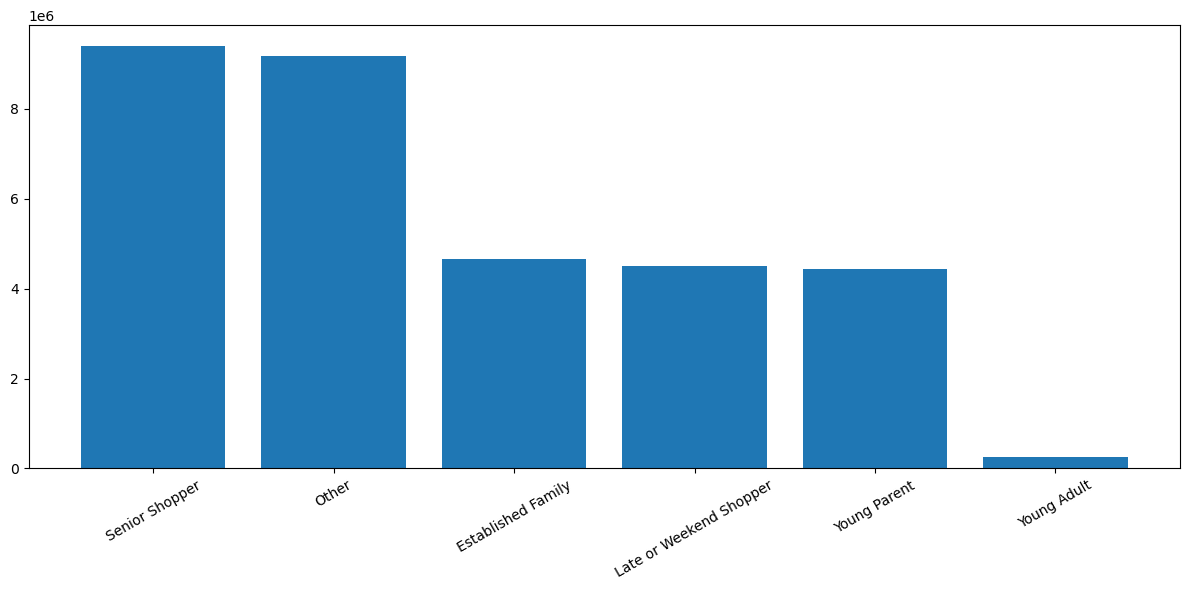

In [53]:
# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(profile_counts.index, profile_counts.values)
plt.xticks(rotation=30, fontsize=10)  # adjust labels
plt.tight_layout()

# Export the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_distribution.png'))

# Display the chart
plt.show()

9. Aggregate metrics by customer profile

In [54]:
# Define aggregation metrics

# Aggregate by customer_profile
profile_agg = orders_products_all.groupby('customer_profile').agg({
    'max_order': ['max', 'mean', 'min'],  # usage frequency
    'prices': ['max', 'mean', 'min']      # expenditure
})

In [55]:
# View the result
profile_agg

max_order                prices               
                              max       mean min    max      mean  min
customer_profile                                                      
Established Family             99  33.080088   3   25.0  7.966386  1.0
Late or Weekend Shopper        99  32.768017   3   25.0  7.681647  1.0
Other                          99  32.878204   3   25.0  7.643805  1.0
Senior Shopper                 99  33.414087   3   25.0  7.961187  1.0
Young Adult                    99  32.063532   3   25.0  6.883993  1.0
Young Parent                   99  32.962045   3   25.0  7.714119  1.0

Key observations:

All profiles have similar max_order_max values (99), indicating some very active customers exist in every group.

Mean order counts are roughly similar across profiles (32–33 orders), with Young Adults slightly lower (32).

Average expenditure (prices_mean) ranges from 6.88 (Young Adults) to 7.96 (Senior Shoppers), suggesting some variation in typical basket value.

Minimum values are identical across profiles (1 order or 1 price unit), showing all profiles include at least one low-activity or low-cost purchase.

06. Customer profiles vs regions.

10. Compare customer profiles across regions

In [58]:
# Cross-reference customer_profile and region
profile_region = pd.crosstab(
    orders_products_all['customer_profile'],
    orders_products_all['region'],
    normalize='index'
) * 100

profile_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Established Family,23.235701,18.087562,33.104879,25.571858
Late or Weekend Shopper,23.597729,17.547156,33.472329,25.382786
Other,23.539339,17.501955,33.438489,25.520216
Senior Shopper,23.294479,17.912178,33.207661,25.585682
Young Adult,23.193447,19.186466,30.959898,26.660188
Young Parent,23.637433,17.043346,33.396383,25.922839


Rows = customer_profile

Columns = region

Values = % of customers in each region per profile

11. Compare customer profiles across departments

In [59]:
# Cross-reference customer_profile and department_id
profile_department = pd.crosstab(
    orders_products_all['customer_profile'],
    orders_products_all['department_id'],
    normalize='index'
) * 100

profile_department

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
customer_profile,,,,,,,,,,,,,,,,,,,,,
Established Family,6.986649,0.110881,3.699451,29.805405,0.467780,0.859522,7.883168,0.326273,2.808098,0.096763,...,2.381146,5.914835,2.088856,3.450356,16.857261,2.263507,1.439216,7.680861,3.264944,0.209753
Late or Weekend Shopper,7.154868,0.114935,3.544700,28.875041,0.514045,0.806210,8.354884,0.312315,2.599743,0.111850,...,2.089448,5.924715,2.194086,3.252402,16.456063,2.348013,1.290273,9.240255,3.175772,0.221970
Other,6.654324,0.113120,3.581018,28.703349,0.489806,0.816318,8.800349,0.277373,2.576700,0.110592,...,1.994087,5.590547,2.262372,3.146714,16.485669,2.312720,1.217045,10.043364,3.232405,0.210493
Senior Shopper,6.996465,0.110430,3.689951,29.924025,0.448519,0.848184,7.887493,0.312665,2.772338,0.102226,...,2.384841,5.899110,2.073785,3.416827,16.894835,2.235605,1.367730,7.786024,3.280164,0.210482
Young Adult,6.465728,0.129839,3.312673,24.443421,0.540002,0.769106,10.511374,0.309707,2.136978,0.119118,...,1.258681,5.108973,2.579700,2.614641,15.631068,2.673803,1.270593,15.168095,3.195937,0.220765
Young Parent,6.850445,0.110099,3.548315,29.038805,0.460438,0.822915,8.357396,0.290662,2.634736,0.112486,...,2.120657,5.721668,2.239966,3.269476,16.580574,2.227806,1.250969,9.543440,3.241507,0.220062


Rows = customer_profile

Columns = department_id

Values = % of orders in each department per profile

This reveals product category preferences for different customer types.

12. Bar chart of regional distribution of customer profiles

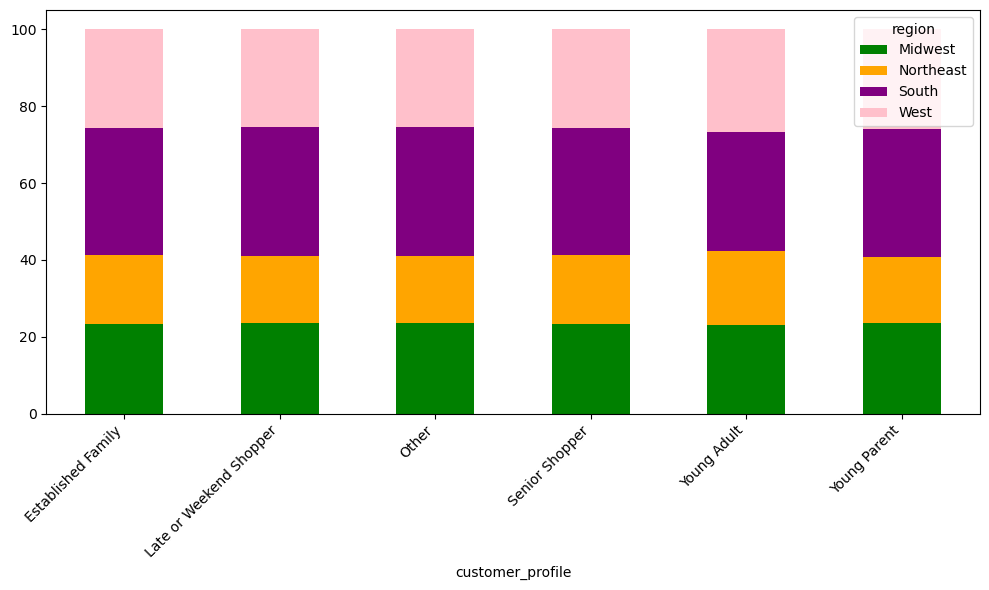

In [67]:
# Define a colorblind-friendly palette using color names
colors = ['green', 'orange', 'purple', 'pink']

# Create stacked bar chart
profile_region.plot(kind='bar', figsize=(10,6), stacked=True, color=colors)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Export the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_by_region.png'))

# Show the chart
plt.show()

13. Bar chart of customer profiles across top departments

In [80]:
# Load the departments_wrangled.csv
departments_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [81]:
print(departments_df.columns)

Index(['department'], dtype='object')


In [85]:
print(departments_df.head(21))

         department
0            frozen
1             other
2            bakery
3           produce
4           alcohol
5     international
6         beverages
7              pets
8   dry goods pasta
9              bulk
10    personal care
11     meat seafood
12           pantry
13        breakfast
14     canned goods
15       dairy eggs
16        household
17           babies
18           snacks
19             deli
20          missing


In [86]:
# Mapping department_id (1–21) to names
dept_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

In [87]:
# Create a new column 'department' with readable names
orders_products_all['department'] = orders_products_all['department_id'].map(dept_mapping)

In [88]:
# Quick check
orders_products_all[['department_id', 'department']].head()

,department_id,department
0,7.0,beverages
1,16.0,dairy eggs
2,19.0,snacks
3,19.0,snacks
4,17.0,household


In [89]:
# Cross-reference customer profiles vs departments

# Count orders per profile per department
profile_dept_counts = pd.crosstab(
    orders_products_all['customer_profile'],
    orders_products_all['department']
)

In [92]:
profile_dept_counts.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
Established Family,21735,66872,171892,366285,97057,4496,160318,783259,151703,130476,...,105172,39937,110638,9746,5152,274828,65295,15160,1384884,356885
Late or Weekend Shopper,23163,58140,159725,376473,98866,5040,146554,741514,143101,117145,...,105802,36328,94151,10002,5179,266969,63914,14073,1301116,416368
Other,44945,111677,328597,807527,207597,10148,288745,1512738,296608,236440,...,212217,74906,182979,19315,10380,512993,126780,25452,2633842,921587
Senior Shopper,42094,128363,346306,740250,194627,9594,320673,1585599,307847,260187,...,209814,79603,223820,19754,10364,553638,127478,29344,2808403,730727
Young Adult,1360,3200,8343,26473,6497,300,6585,39367,8049,5382,...,6734,1937,3170,556,327,12867,3878,780,61561,38201


In [95]:
# Select top departments to keep the chart readable
top_departments = profile_dept_counts.sum().sort_values(ascending=False).head(10).index
profile_dept_top = profile_dept_counts[top_departments]

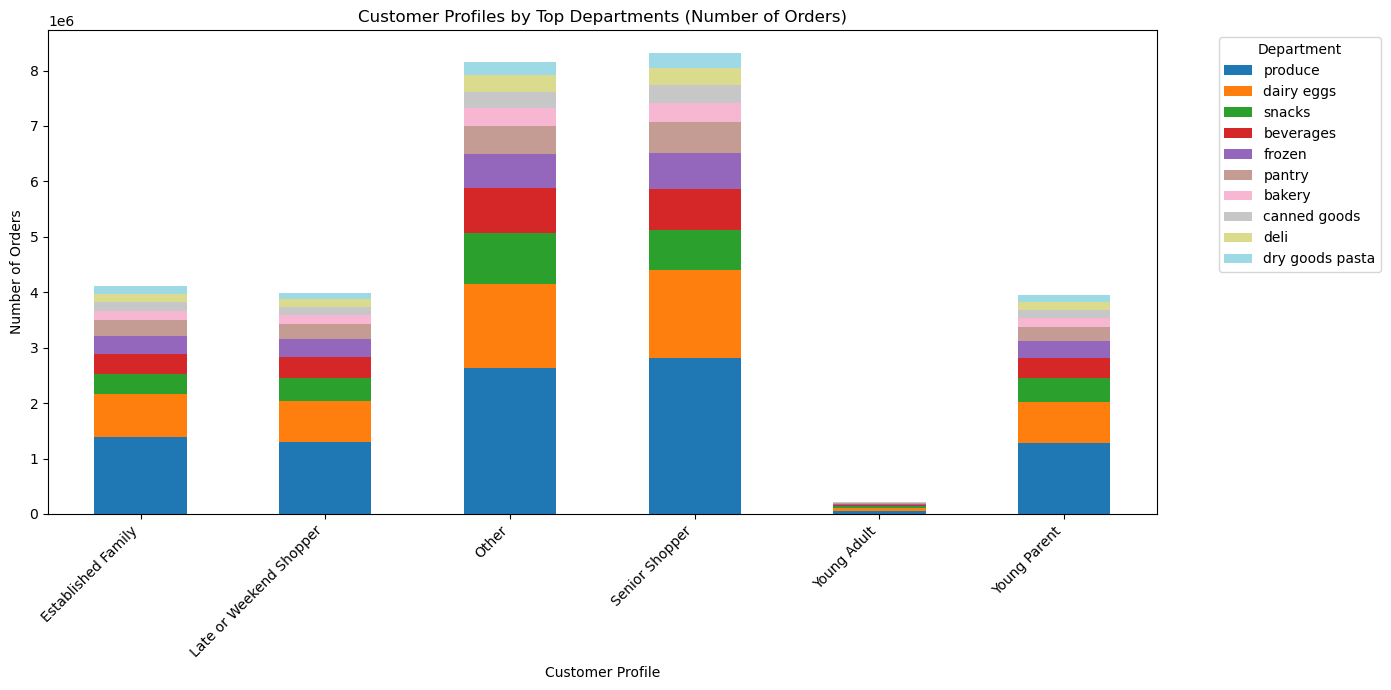

In [98]:
# Create bar chart
profile_dept_top.plot(
    kind='bar',
    stacked=True,
    figsize=(14,7),
    colormap='tab20'  # colorblind-friendly palette
)

plt.title('Customer Profiles by Top Departments (Number of Orders)')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Export chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_by_department.png'))

14. Insights

The analysis shows that:

- Profiles vs regions: The most striking observation from this chart is the remarkable consistency in regional distribution across all six customer profiles. Essentially, the regional makeup is the same whether you look at an "Established Family," a "Senior Shopper," or a "Young Adult."
- Profiles vs departments: Each customer profile shows distinct preferences for certain departments. For example:

Senior Shoppers might order more from produce and dairy.

Young Adults may have more orders in snacks or beverages.

Some departments are popular across all profiles (e.g., produce, dairy), while others are profile-specific, highlighting differences in purchasing behavior.

These patterns suggest that marketing strategies and product promotions can be tailored based on customer profile to increase engagement and revenue.

15. Export the final dataframe

In [6]:
# Export the final dataframe
orders_products_all.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_all_final.pkl'))